In [6]:
import shutil
import os
import glob

from fake_spectra.halospectra import HaloSpectra
from fake_spectra.randspectra import RandSpectra

import sys
sys.path.append('../../py/')

from cosmoSim import cosmoSim
from mpi4py import MPI

In [7]:
runs = [ f'run_2cDM_L3N256_HY_power00_sigma1_dir_{i}' for i in range(9)] \
        + [ f'run_2cDM_L3N256_HY_powerm2m2_sigma1_dir_{i}' for i in range(9)] \
        + ['run_2cDM_L3N256_HY_power00_sigma1', 'run_2cDM_L3N256_HY_powerm2m2_sigma1', 'run_CDM_L3N256_HY']
runs

['run_2cDM_L3N256_HY_power00_sigma1_dir_0',
 'run_2cDM_L3N256_HY_power00_sigma1_dir_1',
 'run_2cDM_L3N256_HY_power00_sigma1_dir_2',
 'run_2cDM_L3N256_HY_power00_sigma1_dir_3',
 'run_2cDM_L3N256_HY_power00_sigma1_dir_4',
 'run_2cDM_L3N256_HY_power00_sigma1_dir_5',
 'run_2cDM_L3N256_HY_power00_sigma1_dir_6',
 'run_2cDM_L3N256_HY_power00_sigma1_dir_7',
 'run_2cDM_L3N256_HY_power00_sigma1_dir_8',
 'run_2cDM_L3N256_HY_powerm2m2_sigma1_dir_0',
 'run_2cDM_L3N256_HY_powerm2m2_sigma1_dir_1',
 'run_2cDM_L3N256_HY_powerm2m2_sigma1_dir_2',
 'run_2cDM_L3N256_HY_powerm2m2_sigma1_dir_3',
 'run_2cDM_L3N256_HY_powerm2m2_sigma1_dir_4',
 'run_2cDM_L3N256_HY_powerm2m2_sigma1_dir_5',
 'run_2cDM_L3N256_HY_powerm2m2_sigma1_dir_6',
 'run_2cDM_L3N256_HY_powerm2m2_sigma1_dir_7',
 'run_2cDM_L3N256_HY_powerm2m2_sigma1_dir_8',
 'run_2cDM_L3N256_HY_power00_sigma1',
 'run_2cDM_L3N256_HY_powerm2m2_sigma1',
 'run_CDM_L3N256_HY']

In [9]:
# Only if you want the MPI feature; otherwise, MPI is None by default
for run in runs:
    rr = RandSpectra(4, "/media/usb/" + run, MPI=MPI, thresh=0.)
    rr.get_tau("H",1,1215)
    #Lyman-beta
    rr.get_tau("H",1,1025)
    rr.get_col_density("H",1)
    #Save spectra to file
    rr.save_file()

Reloading from snapshot (will save to:  /media/usb/run_2cDM_L3N256_HY_power00_sigma1_dir_0/SPECTRA_004/rand_spectra_DLA.hdf5  )
5000  sightlines. resolution:  1.001412231089194  z= 2.9999151729465807
Reloading from snapshot (will save to:  /media/usb/run_2cDM_L3N256_HY_power00_sigma1_dir_1/SPECTRA_004/rand_spectra_DLA.hdf5  )
5000  sightlines. resolution:  1.0009084509237824  z= 2.995420558949888
Reloading from snapshot (will save to:  /media/usb/run_2cDM_L3N256_HY_power00_sigma1_dir_2/SPECTRA_004/rand_spectra_DLA.hdf5  )
5000  sightlines. resolution:  1.001412231089194  z= 2.9999151729465807
Reloading from snapshot (will save to:  /media/usb/run_2cDM_L3N256_HY_power00_sigma1_dir_3/SPECTRA_004/rand_spectra_DLA.hdf5  )
5000  sightlines. resolution:  1.001412231089194  z= 2.9999151729465807
Reloading from snapshot (will save to:  /media/usb/run_2cDM_L3N256_HY_power00_sigma1_dir_4/SPECTRA_004/rand_spectra_DLA.hdf5  )
5000  sightlines. resolution:  1.001412231089194  z= 2.9999151729465807


In [10]:
for run in runs:
    fpaths = glob.glob(f"/media/usb/{run}/SPECTRA_00*")
    
    outpath = f'../../data_prods/{run}/'
    for fpath in fpaths:
        fname = os.path.basename(fpath)
        shutil.copytree(fpath, outpath + fname)

Reading pre-computed spectra (from file /media/usb/run_2cDM_L3N256_HY_power00_sigma1/SPECTRA_004/rand_spectra_DLA.hdf5  )
5000  sightlines. resolution:  1.0014115820184988  z= 2.9999151729465807


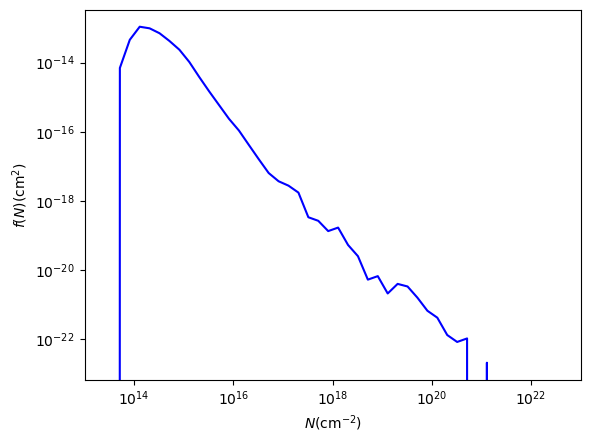

In [10]:
from fake_spectra.plot_spectra import PlottingSpectra

ps = PlottingSpectra(num=4,base="/media/usb/run_2cDM_L3N256_HY_power00_sigma1/", label="thisisatest",savefile="/media/usb/run_2cDM_L3N256_HY_power00_sigma1/SPECTRA_004/rand_spectra_DLA.hdf5")
ps.plot_cddf("H",1)

137

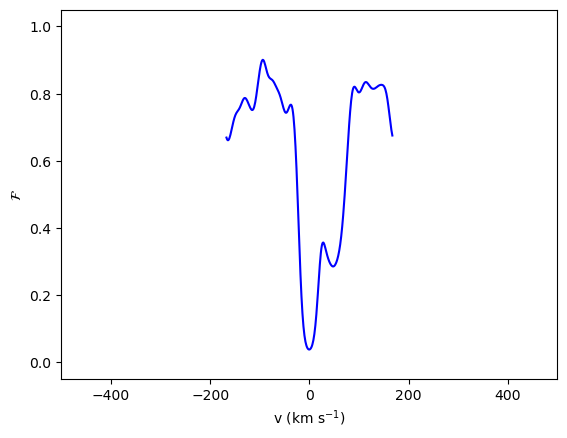

In [14]:
ps.plot_spectrum("H", 1, 1215, 0)